In [1]:
import pandas as pd
import numpy as np

# Load clinical data
file_path = "/Users/heweilin/Desktop/P056/7Clinical_data50.csv"
data = pd.read_csv(file_path)

print("=== Basic Data Information ===")
print(f"Total sample size: {len(data)}")
print(f"Column names: {list(data.columns)}")
print(f"Data shape: {data.shape}")

# Check first few rows
print("\n=== First 3 Sample Records ===")
for i in range(3):
    print(f"Sample {i+1}: NTUID={data.iloc[i]['NTUID']}, B12_status={data.iloc[i]['B12_status']}, B12_mol={data.iloc[i]['B12_mol']:.2f}")

# Basic descriptive statistics
print("\n=== Age Statistics ===")
ages = data['age'].dropna()
age_mean = ages.mean()
age_std = ages.std()
print(f"Mean age: {age_mean:.1f} ± {age_std:.1f} years")
print(f"Age range: {ages.min():.1f} to {ages.max():.1f} years")

print("\n=== BMI Statistics ===")
bmis = data['BMI'].dropna()
bmi_mean = bmis.mean()
bmi_std = bmis.std()
print(f"Mean BMI: {bmi_mean:.1f} ± {bmi_std:.1f} kg/m²")
print(f"BMI range: {bmis.min():.1f} to {bmis.max():.1f} kg/m²")

# BMI categorization
def categorize_bmi(bmi):
    if bmi < 25:
        return "Normal weight"
    elif bmi < 30:
        return "Overweight"
    elif bmi < 35:
        return "Obesity class I"
    elif bmi < 40:
        return "Obesity class II"
    else:
        return "Obesity class III"

data['BMI_category'] = data['BMI'].apply(categorize_bmi)
bmi_counts = data['BMI_category'].value_counts()

print("\n=== BMI Category Distribution ===")
for category, count in bmi_counts.items():
    percentage = (count / 50) * 100
    print(f"{category}: {count} ({percentage:.0f}%)")

# Ethnicity distribution
print("\n=== Ethnicity Distribution ===")
ethnicity_counts = data['ethnicity'].value_counts()
for ethnicity, count in ethnicity_counts.items():
    percentage = (count / 50) * 100
    print(f"{ethnicity}: {count} ({percentage:.0f}%)")

# Parity distribution
print("\n=== Parity Distribution ===")
parity_primipara = len(data[data['parity'] == 1])
parity_multipara = len(data[data['parity'] > 1])
print(f"Primipara (parity=1): {parity_primipara} ({parity_primipara/50*100:.0f}%)")
print(f"Multipara (parity>1): {parity_multipara} ({parity_multipara/50*100:.0f}%)")

# B12 supplement usage
print("\n=== B12 Supplement Usage ===")
supplement_used = len(data[data['B12supplem'] == 1])
supplement_not_used_or_missing = 50 - supplement_used
print(f"Used: {supplement_used} ({supplement_used/50*100:.0f}%)")
print(f"Not used/Missing: {supplement_not_used_or_missing} ({supplement_not_used_or_missing/50*100:.0f}%)")

# B12 status validation
print("\n=== B12 Status Validation ===")
b12_status_counts = data['B12_status'].value_counts()
print(f"LB group: {b12_status_counts['LB']} samples")
print(f"NB group: {b12_status_counts['NB']} samples")

# B12 concentration analysis by group
print("\n=== B12 Concentration Analysis by Group ===")
lb_group = data[data['B12_status'] == 'LB']
nb_group = data[data['B12_status'] == 'NB']

lb_b12_values = lb_group['B12_mol'].dropna()
nb_b12_values = nb_group['B12_mol'].dropna()

print(f"LB group (n={len(lb_group)}):")
print(f"  Concentration range: {lb_b12_values.min():.2f} - {lb_b12_values.max():.2f} pmol/L")
print(f"  Mean ± SD: {lb_b12_values.mean():.2f} ± {lb_b12_values.std():.2f} pmol/L")

print(f"NB group (n={len(nb_group)}):")
print(f"  Concentration range: {nb_b12_values.min():.2f} - {nb_b12_values.max():.2f} pmol/L")
print(f"  Mean ± SD: {nb_b12_values.mean():.2f} ± {nb_b12_values.std():.2f} pmol/L")

# Clinical characteristics comparison between LB and NB groups
print("\n=== Clinical Characteristics Comparison: LB vs NB Groups ===")

# Age comparison
lb_ages = lb_group['age'].dropna()
nb_ages = nb_group['age'].dropna()
print("Age comparison:")
print(f"  LB group: {lb_ages.mean():.1f} ± {lb_ages.std():.1f} years")
print(f"  NB group: {nb_ages.mean():.1f} ± {nb_ages.std():.1f} years")

# BMI comparison
lb_bmis = lb_group['BMI'].dropna()
nb_bmis = nb_group['BMI'].dropna()
print("BMI comparison:")
print(f"  LB group: {lb_bmis.mean():.1f} ± {lb_bmis.std():.1f} kg/m²")
print(f"  NB group: {nb_bmis.mean():.1f} ± {nb_bmis.std():.1f} kg/m²")

# B12 supplement usage comparison
lb_supplement = len(lb_group[lb_group['B12supplem'] == 1])
nb_supplement = len(nb_group[nb_group['B12supplem'] == 1])
print("B12 supplement usage comparison:")
print(f"  LB group using supplements: {lb_supplement} ({lb_supplement/25*100:.0f}%)")
print(f"  NB group using supplements: {nb_supplement} ({nb_supplement/25*100:.0f}%)")

# Ethnicity distribution comparison
print("Ethnicity distribution comparison:")
lb_caucasian = len(lb_group[lb_group['ethnicity'] == 'Caucasian'])
nb_caucasian = len(nb_group[nb_group['ethnicity'] == 'Caucasian'])
lb_south_asian = len(lb_group[lb_group['ethnicity'] == 'South Asian'])
nb_south_asian = len(nb_group[nb_group['ethnicity'] == 'South Asian'])

print(f"  Caucasian: LB group {lb_caucasian} ({lb_caucasian/25*100:.0f}%), NB group {nb_caucasian} ({nb_caucasian/25*100:.0f}%)")
print(f"  South Asian: LB group {lb_south_asian} ({lb_south_asian/25*100:.0f}%), NB group {nb_south_asian} ({nb_south_asian/25*100:.0f}%)")

# Parity comparison
lb_parity1 = len(lb_group[lb_group['parity'] == 1])
nb_parity1 = len(nb_group[nb_group['parity'] == 1])
print("Parity comparison:")
print(f"  LB group primipara: {lb_parity1} ({lb_parity1/25*100:.0f}%)")
print(f"  NB group primipara: {nb_parity1} ({nb_parity1/25*100:.0f}%)")

# Batch distribution analysis
print("\n=== Batch Distribution Analysis with B12 Status Cross-tabulation ===")

# mRNA batch distribution
print("mRNA batch distribution:")
mrna_batch_groups = data.groupby('batch_mRNA')
for batch, group in mrna_batch_groups:
    lb_count = len(group[group['B12_status'] == 'LB'])
    nb_count = len(group[group['B12_status'] == 'NB'])
    total = len(group)
    print(f"  Batch {batch}: {total} samples (LB:{lb_count}, NB:{nb_count})")

# miRNA batch distribution
print("miRNA batch distribution:")
mirna_batch_groups = data.groupby('batch_miRNA')
for batch, group in mirna_batch_groups:
    lb_count = len(group[group['B12_status'] == 'LB'])
    nb_count = len(group[group['B12_status'] == 'NB'])
    total = len(group)
    print(f"  Batch {batch}: {total} samples (LB:{lb_count}, NB:{nb_count})")

# DNA batch distribution
print("DNA batch distribution:")
dna_batch_groups = data.groupby('batch_DNA')
for batch, group in dna_batch_groups:
    lb_count = len(group[group['B12_status'] == 'LB'])
    nb_count = len(group[group['B12_status'] == 'NB'])
    total = len(group)
    print(f"  Batch {batch}: {total} samples (LB:{lb_count}, NB:{nb_count})")

# Data completeness check
print("\n=== Data Completeness Check ===")
print(f"Total samples: {len(data)}")
complete_id_samples = len(data.dropna(subset=['DNA_ID', 'mRNA_ID', 'sRNA_ID']))
print(f"Samples with complete ID matching: {complete_id_samples}")
b12_missing = data['B12_mol'].isna().sum()
age_missing = data['age'].isna().sum()
print(f"B12 concentration missing values: {b12_missing}")
print(f"Age missing values: {age_missing}")


=== Basic Data Information ===
Total sample size: 50
Column names: ['NTUID', 'DNA_ID', 'mRNA_ID', 'sRNA_ID', 'age', 'BMI', 'BMI_cat', 'B12_status', 'B12_mol', 'B12supplem', 'ethnicity', 'parity', 'V1_se_EmploymentStatus', 'V1_se_HouseholdIncome', 'v1p_MultivitTab', 'v1p_FolicAcid', 'smoking', 'v3n_Gender', 'batch_miRNA', 'batch_mRNA', 'batch_DNA']
Data shape: (50, 21)

=== First 3 Sample Records ===
Sample 1: NTUID=102, B12_status=NB, B12_mol=292.62
Sample 2: NTUID=105, B12_status=NB, B12_mol=362.21
Sample 3: NTUID=111, B12_status=NB, B12_mol=312.40

=== Age Statistics ===
Mean age: 30.7 ± 5.2 years
Age range: 20.5 to 42.2 years

=== BMI Statistics ===
Mean BMI: 29.6 ± 7.7 kg/m²
BMI range: 19.3 to 46.6 kg/m²

=== BMI Category Distribution ===
Normal weight: 22 (44%)
Obesity class II: 15 (30%)
Obesity class I: 5 (10%)
Overweight: 4 (8%)
Obesity class III: 4 (8%)

=== Ethnicity Distribution ===
Caucasian: 34 (68%)
South Asian: 10 (20%)
Other: 6 (12%)

=== Parity Distribution ===
Primipar

Figure saved to: /Users/heweilin/Desktop/P056_Code_3/Figure/B12_clinical_analysis.png


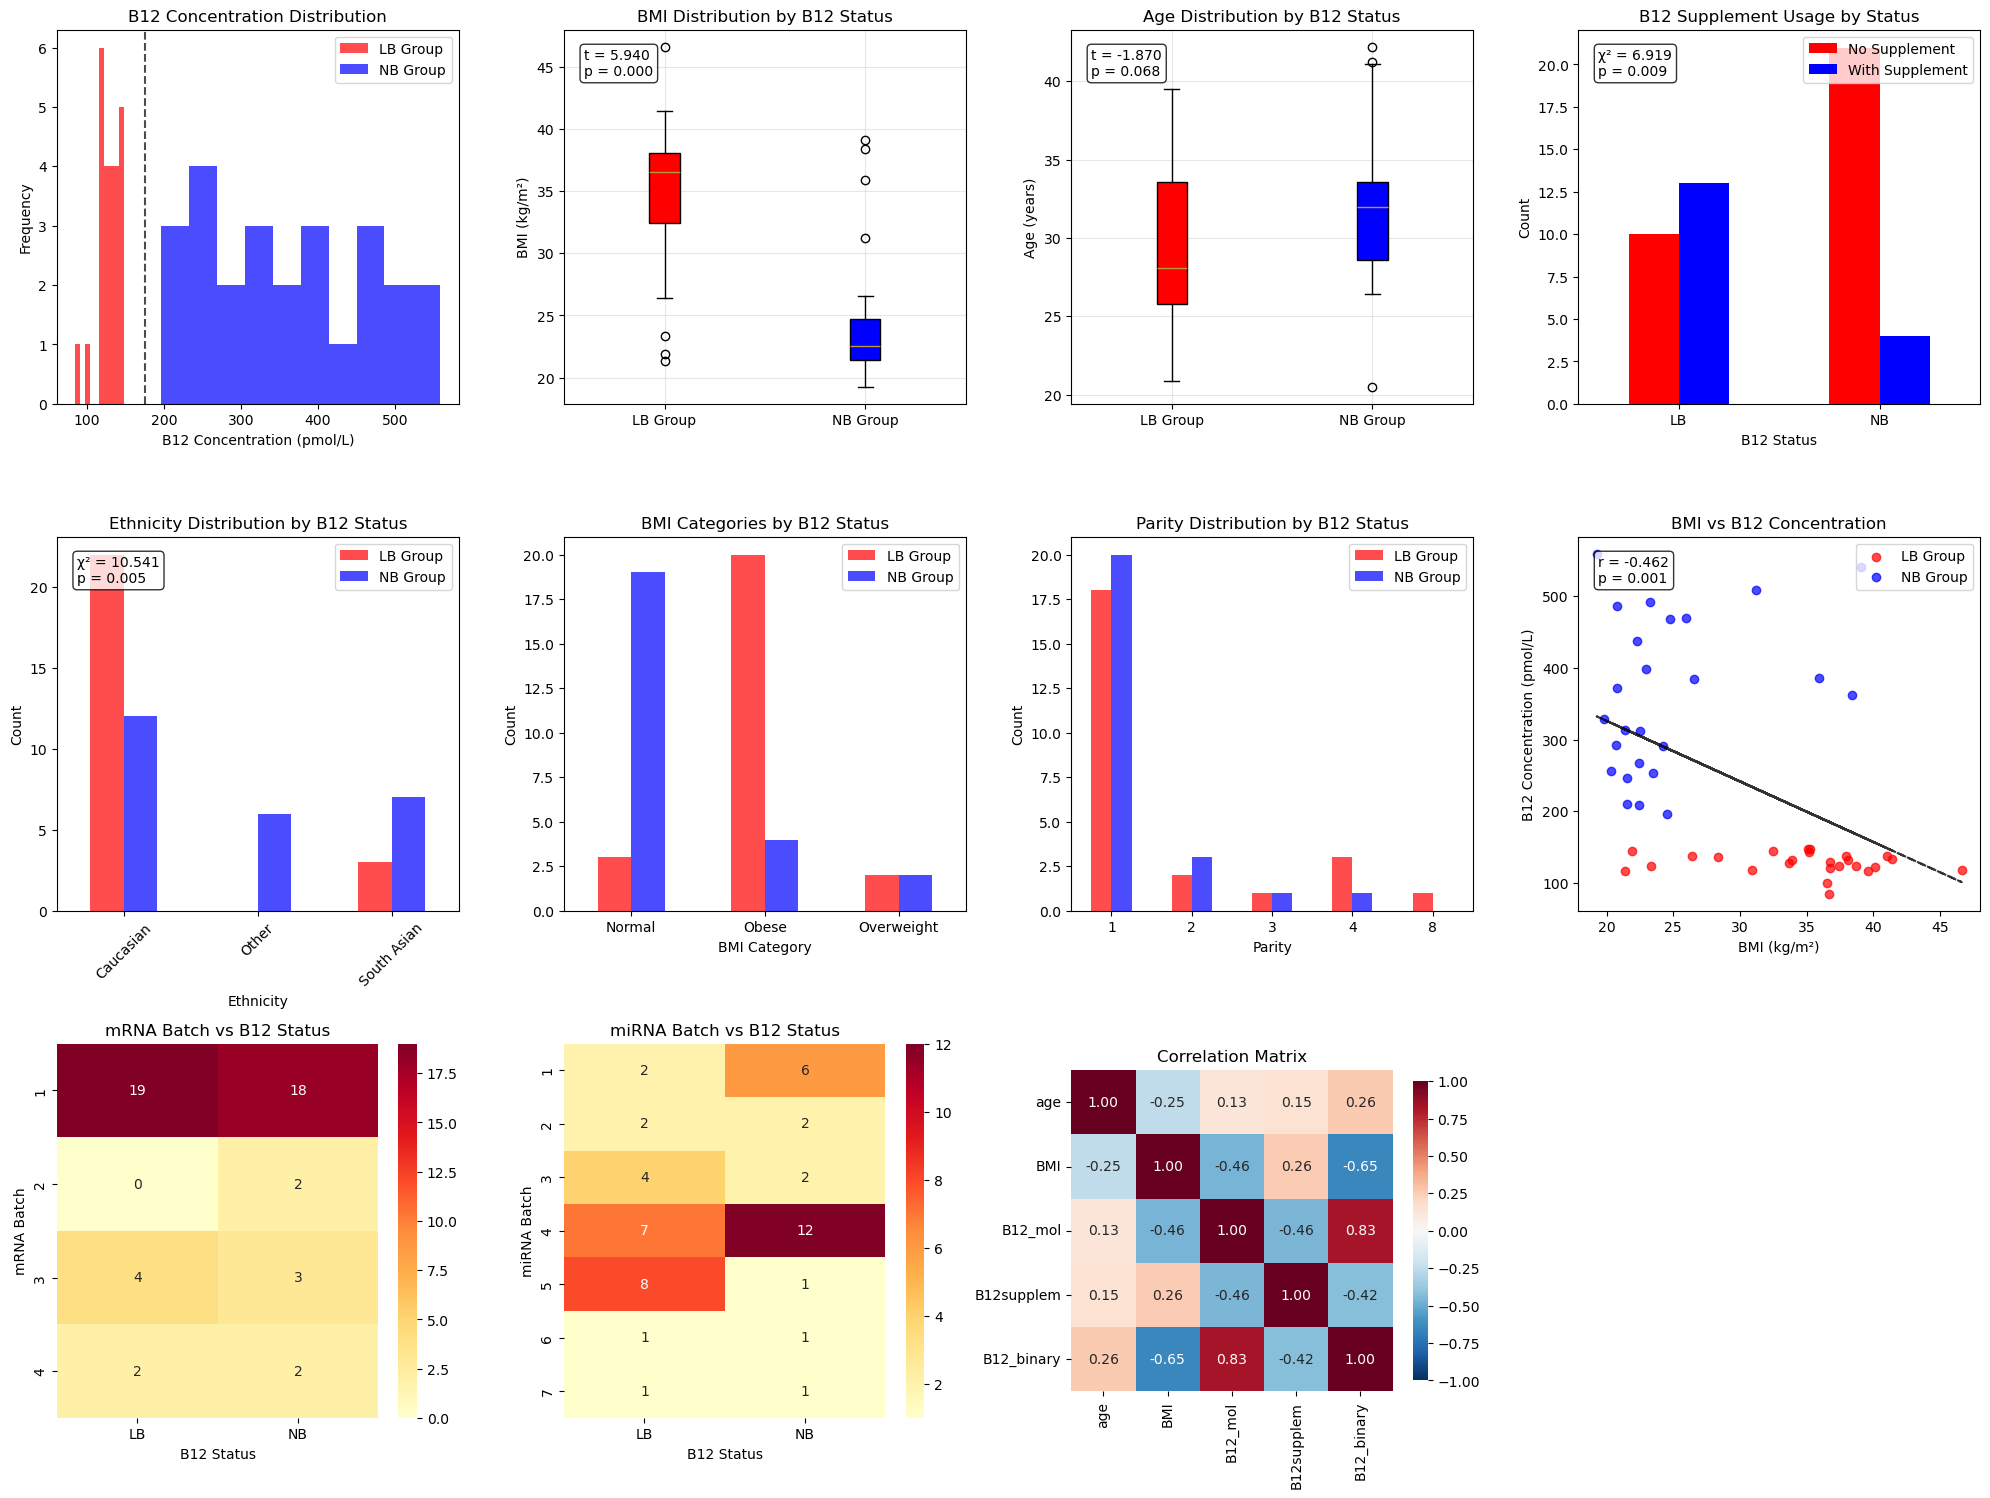

=== Statistical Analysis Summary ===
BMI comparison (t-test): t = 5.940, p = 0.000
Age comparison (t-test): t = -1.870, p = 0.068
B12 supplement usage (chi-square): χ² = 6.919, p = 0.009
Ethnicity distribution (chi-square): χ² = 10.541, p = 0.005
BMI vs B12 correlation: r = -0.462, p = 0.001

=== Effect Sizes ===
Cohen's d for BMI difference: -1.680 (Large effect if |d| > 0.8)
Cramér's V for B12 supplement: 0.380
Cramér's V for ethnicity: 0.459
(V > 0.3 indicates strong association)


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('default')
sns.set_palette("husl")

# Load data
file_path = "/Users/heweilin/Desktop/P056/7Clinical_data50.csv"
data = pd.read_csv(file_path)

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# 1. B12 concentration distribution by group
ax1 = plt.subplot(3, 4, 1)
lb_b12 = data[data['B12_status'] == 'LB']['B12_mol']
nb_b12 = data[data['B12_status'] == 'NB']['B12_mol']

plt.hist(lb_b12, alpha=0.7, label='LB Group', color='red', bins=10)
plt.hist(nb_b12, alpha=0.7, label='NB Group', color='blue', bins=10)
plt.xlabel('B12 Concentration (pmol/L)')
plt.ylabel('Frequency')
plt.title('B12 Concentration Distribution')
plt.legend()
plt.axvline(x=175, color='black', linestyle='--', alpha=0.7, label='Cutoff (~175)')

# 2. BMI comparison boxplot
ax2 = plt.subplot(3, 4, 2)
bmi_data = [data[data['B12_status'] == 'LB']['BMI'].dropna(), 
            data[data['B12_status'] == 'NB']['BMI'].dropna()]
bp = plt.boxplot(bmi_data, labels=['LB Group', 'NB Group'], patch_artist=True)
bp['boxes'][0].set_facecolor('red')
bp['boxes'][1].set_facecolor('blue')
plt.ylabel('BMI (kg/m²)')
plt.title('BMI Distribution by B12 Status')
plt.grid(True, alpha=0.3)

# Add BMI statistical test result
bmi_t_stat, bmi_p_val = stats.ttest_ind(bmi_data[0], bmi_data[1])
plt.text(0.05, 0.95, f't = {bmi_t_stat:.3f}\np = {bmi_p_val:.3f}', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 3. Age comparison boxplot
ax3 = plt.subplot(3, 4, 3)
age_data = [data[data['B12_status'] == 'LB']['age'].dropna(), 
            data[data['B12_status'] == 'NB']['age'].dropna()]
bp = plt.boxplot(age_data, labels=['LB Group', 'NB Group'], patch_artist=True)
bp['boxes'][0].set_facecolor('red')
bp['boxes'][1].set_facecolor('blue')
plt.ylabel('Age (years)')
plt.title('Age Distribution by B12 Status')
plt.grid(True, alpha=0.3)

# Add Age statistical test result
age_t_stat, age_p_val = stats.ttest_ind(age_data[0], age_data[1])
plt.text(0.05, 0.95, f't = {age_t_stat:.3f}\np = {age_p_val:.3f}', 
         transform=ax3.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 4. B12 supplement usage comparison
ax4 = plt.subplot(3, 4, 4)
supplement_crosstab = pd.crosstab(data['B12_status'], data['B12supplem'])
supplement_crosstab.plot(kind='bar', ax=ax4, color=['red', 'blue'])
plt.xlabel('B12 Status')
plt.ylabel('Count')
plt.title('B12 Supplement Usage by Status')
plt.legend(['No Supplement', 'With Supplement'])
plt.xticks(rotation=0)

# Add chi-square test result
supp_chi2, supp_p_val, _, _ = stats.chi2_contingency(supplement_crosstab)
plt.text(0.05, 0.95, f'χ² = {supp_chi2:.3f}\np = {supp_p_val:.3f}', 
         transform=ax4.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 5. Ethnicity distribution
ax5 = plt.subplot(3, 4, 5)
ethnicity_crosstab = pd.crosstab(data['ethnicity'], data['B12_status'])
ethnicity_crosstab.plot(kind='bar', ax=ax5, color=['red', 'blue'], alpha=0.7)
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity Distribution by B12 Status')
plt.legend(['LB Group', 'NB Group'])
plt.xticks(rotation=45)

# Add chi-square test result
eth_chi2, eth_p_val, _, _ = stats.chi2_contingency(pd.crosstab(data['B12_status'], data['ethnicity']))
plt.text(0.05, 0.95, f'χ² = {eth_chi2:.3f}\np = {eth_p_val:.3f}', 
         transform=ax5.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 6. BMI categories by B12 status
ax6 = plt.subplot(3, 4, 6)
def categorize_bmi(bmi):
    if bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

data['BMI_simple'] = data['BMI'].apply(categorize_bmi)
bmi_cat_crosstab = pd.crosstab(data['BMI_simple'], data['B12_status'])
bmi_cat_crosstab.plot(kind='bar', ax=ax6, color=['red', 'blue'], alpha=0.7)
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('BMI Categories by B12 Status')
plt.legend(['LB Group', 'NB Group'])
plt.xticks(rotation=0)

# 7. Parity distribution
ax7 = plt.subplot(3, 4, 7)
parity_crosstab = pd.crosstab(data['parity'], data['B12_status'])
parity_crosstab.plot(kind='bar', ax=ax7, color=['red', 'blue'], alpha=0.7)
plt.xlabel('Parity')
plt.ylabel('Count')
plt.title('Parity Distribution by B12 Status')
plt.legend(['LB Group', 'NB Group'])
plt.xticks(rotation=0)

# 8. Scatter plot: BMI vs B12 concentration
ax8 = plt.subplot(3, 4, 8)
lb_data = data[data['B12_status'] == 'LB']
nb_data = data[data['B12_status'] == 'NB']

# Scatter plot
ax8.scatter(lb_data['BMI'], lb_data['B12_mol'], color='red', alpha=0.7, label='LB Group')
ax8.scatter(nb_data['BMI'], nb_data['B12_mol'], color='blue', alpha=0.7, label='NB Group')

# Axis labels and title
ax8.set_xlabel('BMI (kg/m²)')
ax8.set_ylabel('B12 Concentration (pmol/L)')
ax8.set_title('BMI vs B12 Concentration')

# Legend in the upper right corner
ax8.legend(loc='upper right')

# Add correlation line
x = data['BMI'].dropna()
y = data['B12_mol'].dropna()
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax8.plot(x, p(x), "k--", alpha=0.8)

# Pearson correlation coefficient and p-value
correlation, corr_p_val = stats.pearsonr(x, y)
ax8.text(0.05, 0.95, f'r = {correlation:.3f}\np = {corr_p_val:.3f}', 
         transform=ax8.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 9. Batch distribution heatmap for mRNA
ax9 = plt.subplot(3, 4, 9)
mrna_batch_crosstab = pd.crosstab(data['batch_mRNA'], data['B12_status'])
sns.heatmap(mrna_batch_crosstab, annot=True, fmt='d', cmap='YlOrRd', ax=ax9)
plt.xlabel('B12 Status')
plt.ylabel('mRNA Batch')
plt.title('mRNA Batch vs B12 Status')

# 10. Batch distribution heatmap for miRNA
ax10 = plt.subplot(3, 4, 10)
mirna_batch_crosstab = pd.crosstab(data['batch_miRNA'], data['B12_status'])
sns.heatmap(mirna_batch_crosstab, annot=True, fmt='d', cmap='YlOrRd', ax=ax10)
plt.xlabel('B12 Status')
plt.ylabel('miRNA Batch')
plt.title('miRNA Batch vs B12 Status')

# 11. Correlation heatmap of continuous variables
ax11 = plt.subplot(3, 4, 11)

# Create binary encoding for B12 status
data['B12_binary'] = (data['B12_status'] == 'NB').astype(int)
corr_vars = ['age', 'BMI', 'B12_mol', 'B12supplem', 'B12_binary']
corr_matrix = data[corr_vars].corr()

# Heatmap with standard red-blue color (blue = negative, red = positive)
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdBu_r',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
    ax=ax11
)

ax11.set_title('Correlation Matrix')

# Adjust layout to make room for text
plt.tight_layout()



# Calculate all statistics first
# BMI t-test
lb_bmi = data[data['B12_status'] == 'LB']['BMI'].dropna()
nb_bmi = data[data['B12_status'] == 'NB']['BMI'].dropna()
bmi_t_stat, bmi_p_val = stats.ttest_ind(lb_bmi, nb_bmi)

# Age t-test
lb_age = data[data['B12_status'] == 'LB']['age'].dropna()
nb_age = data[data['B12_status'] == 'NB']['age'].dropna()
age_t_stat, age_p_val = stats.ttest_ind(lb_age, nb_age)

# Chi-square test for supplement usage
supplement_crosstab = pd.crosstab(data['B12_status'], data['B12supplem'])
supp_chi2, supp_p_val, _, _ = stats.chi2_contingency(supplement_crosstab)

# Chi-square test for ethnicity
ethnicity_crosstab = pd.crosstab(data['B12_status'], data['ethnicity'])
eth_chi2, eth_p_val, _, _ = stats.chi2_contingency(ethnicity_crosstab)

# Correlation between BMI and B12
corr_coef, corr_p_val = stats.pearsonr(data['BMI'].dropna(), data['B12_mol'].dropna())

# Effect sizes
# Cohen's d for BMI
pooled_std = np.sqrt(((len(lb_bmi)-1)*lb_bmi.var() + (len(nb_bmi)-1)*nb_bmi.var()) / (len(lb_bmi)+len(nb_bmi)-2))
cohens_d = (nb_bmi.mean() - lb_bmi.mean()) / pooled_std

# Cramér's V for categorical associations
def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    return np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

v_supplement = cramers_v(data['B12_status'], data['B12supplem'])
v_ethnicity = cramers_v(data['B12_status'], data['ethnicity'])



# Save the figure
save_path = "/Users/heweilin/Desktop/P056_Code_3/Figure/B12_clinical_analysis.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Figure saved to: {save_path}")
plt.show()

# Print statistical summary to console as well
print("=== Statistical Analysis Summary ===")
print(f"BMI comparison (t-test): t = {bmi_t_stat:.3f}, p = {bmi_p_val:.3f}")
print(f"Age comparison (t-test): t = {age_t_stat:.3f}, p = {age_p_val:.3f}")
print(f"B12 supplement usage (chi-square): χ² = {supp_chi2:.3f}, p = {supp_p_val:.3f}")
print(f"Ethnicity distribution (chi-square): χ² = {eth_chi2:.3f}, p = {eth_p_val:.3f}")
print(f"BMI vs B12 correlation: r = {corr_coef:.3f}, p = {corr_p_val:.3f}")

print("\n=== Effect Sizes ===")
print(f"Cohen's d for BMI difference: {cohens_d:.3f} (Large effect if |d| > 0.8)")
print(f"Cramér's V for B12 supplement: {v_supplement:.3f}")
print(f"Cramér's V for ethnicity: {v_ethnicity:.3f}")
print("(V > 0.3 indicates strong association)")